# Lecture 9 II– Spring 2024

In [57]:
# load your required Librariess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [58]:
# read dataframe
df=pd.read_csv('./data/world_bank.csv')
df.head()

,Unnamed: 0,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
4,5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


In [59]:
# code here
df.shape

(166, 48)

In [60]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
4,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


## Bar Plots

We often use bar plots to display **distributions** of a **categorical variable**.

In the examples below, we plot the distribution of the `"Continent"` column. The cell below uses `.value_counts()` to determine the number of countries corresponding to each continent in the dataset.

In [61]:
continent=df['Continent'].value_counts()
continent

Continent
Africa        47
Europe        43
Asia          34
N. America    18
Oceania       13
S. America    11
Name: count, dtype: int64

## Histograms

You are likely familiar with histograms. A histogram collects continuous data into bins, then plots this binned data. Each bin reflects the density of datapoints with values that lie between the left and right ends of the bin.

In [62]:
px.bar(continent)

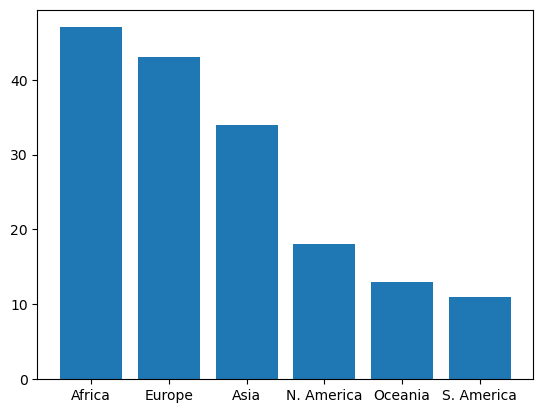

In [63]:
plt.bar(continent.index,continent.values);

In [64]:
# Draw histogram of Gross national income
# The `edgecolor` argument controls the color of the bin edges
# log_capita=np.log10(df['Gross national income per capita, Atlas method: $: 2016'])
fig=px.histogram(df['Gross national income per capita, Atlas method: $: 2016'],
                 histnorm='probability density',
                 nbins=23,
                 )
# Add labels
fig.update_layout(
    xaxis_title="Gross national income per capita (Atlas method, $): 2016",
    yaxis_title="Density",
    showlegend=False
)
fig.update_traces(
    marker_color='teal',
    marker_line_color='white',
    marker_line_width=1
    )
fig.show()

We can overlay histograms (or density curves) to compare distributions across qualitative categories.

The `hue` parameter of `sns.histplot` specifies the column that should be used to determine the color of each category. `hue` can be used in many Seaborn plotting functions.

Notice that the resulting plot includes a legend describing which color corresponds to each hemisphere – a legend should always be included if color is used to encode information in a visualization!

In [65]:
df['Continent'].unique()

array(['Africa', 'Asia', 'Europe', 'N. America', 'Oceania', 'S. America'],
      dtype=object)

In [66]:
# Create a new variable to store the hemisphere in which each country is located i.e. either Northern, Southern

df['Hemisphere']=df['Continent'].apply(lambda x: 'Southern' if x in ['Oceania','S. America','Africa'] else 'Northern')

In [67]:
# Create histogram for Gross national Income, use New created column as hue parameter in .histplot function

fig = px.histogram(
    df, 
    x=df['Gross national income per capita, Atlas method: $: 2016'], 
    color='Hemisphere',
    histnorm='probability density',
    nbins=23
)

# Add labels
fig.update_layout(
    xaxis_title="Log of Gross National Income per capita (Atlas method, $): 2016",
    yaxis_title="Density",
    legend_title="Hemisphere",
)

# Customize bin edge colors
fig.update_traces(
    marker_line_color='white',
    marker_line_width=1
)

fig.show()


Each bin of a histogram is scaled such that its area is equal to the percentage of all datapoints that it contains.

In [68]:
# Draw histogram of Gross national income
# The `edgecolor` argument controls the color of the bin edges
# log_capita=np.log10(df['Gross national income per capita, Atlas method: $: 2016'])
fig=px.histogram(df['Gross national income per capita, Atlas method: $: 2016'],
                 histnorm='probability density',
                 nbins=23,
                 )
# Add labels
fig.update_layout(
    xaxis_title="Gross national income per capita",
    yaxis_title="Density",
    showlegend=False
)
fig.update_traces(
    marker_color='teal',
    marker_line_color='white',
    marker_line_width=1
    )
fig.show()

In [69]:
# Extract GNI data
gni = df['Gross national income per capita, Atlas method: $: 2016']

#  Handle NaN values
gni = gni.dropna()

# Create histogram
fig = px.histogram(gni,
                   histnorm='probability density',
                   nbins=5)

# Update layout
fig.update_layout(
    xaxis_title="Gross national income per capita",
    yaxis_title="Density",
    showlegend=False
)

# Update traces
fig.update_traces(
    marker_color='teal',
    marker_line_color='white',
    marker_line_width=1
)

# Show the histogram
fig.show()
# Calculate histogram data to get bin edges
hist_data, bin_edges = np.histogram(gni, bins=5)

# Calculate data points in the first bin
data_in_bin = gni[(gni >= bin_edges[0]) & (gni < bin_edges[1])]
num_data_points_in_first_bin = len(data_in_bin)

# Print the number of data points in the first bin
print('The number of data points in the first bin are:', num_data_points_in_first_bin)

# Calculate height
height = hist_data[0]

# Calculate width of the first bin
width = bin_edges[1] - bin_edges[0]

# Area of the first bin
area = height * width

# Print height, width, and area
print('Height of the first bin:', height)
print('Width of the first bin:', width)
print('Area of the first bin:', area)

The number of data points in the first bin are: 123
Height of the first bin: 123
Width of the first bin: 16410.0
Area of the first bin: 2018430.0


We describe a "mode" of a histogram as a peak in the distribution. Often, however, it is difficult to determine what counts as its own "peak." For example, the number of peaks in the distribution of HIV rates across different countries varies depending on the number of histogram bins we plot.

In [70]:
df.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':'HIV_2015'},inplace=True)
HIV=df['HIV_2015']

In [71]:
fig = px.histogram(df, x=HIV, nbins=5, histnorm='probability density')

fig.update_layout(
    xaxis_title="HIV rate",
    yaxis_title="Density",
    showlegend=False,
    bargap=0.1
)
fig.update_traces(
    marker_color='red'
)
fig.show()

In [72]:
# With 10 bins, there seem to be two peaks
fig = px.histogram(df, x=HIV, nbins=10, histnorm='probability density')

fig.update_layout(
    xaxis_title="HIV rate",
    yaxis_title="Density",
    showlegend=False,
    bargap=0.1
)
fig.update_traces(
    marker_color='teal'
)
fig.show()

In [73]:
# And with 20 bins, it becomes hard to say what counts as a "peak"!
fig = px.histogram(df, x=HIV, nbins=20, histnorm='probability density')

fig.update_layout(
    xaxis_title="HIV rate",
    yaxis_title="Density",
    showlegend=False,
    bargap=0.1
)
fig.update_traces(
    marker_color='brown'
)

fig.show()


As this example illustrates, it is sometimes more useful to understand the general structure of our data, rather than focus on individual observations. Kernel density estimation helps with this goal.

## Kernel Density Estimation

Kernel density estimation (KDE) allows us to "smooth" a distribution to display general trends and eliminate noisy, distracting detail.

c:\Users\nasrullah\.conda\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



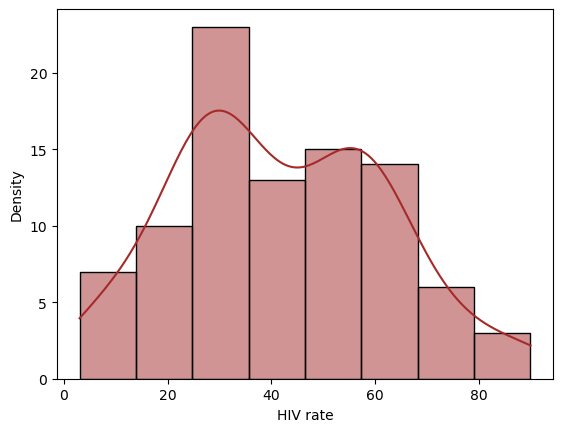

<Figure size 1200x800 with 0 Axes>

In [74]:
# The smooth curve overlaid on the histogram is a KDE
sns.histplot(HIV, bins=8, kde=True, color="brown");
plt.xlabel('HIV rate');
plt.ylabel('Density');
plt.figure(figsize=[12,8]);
plt.show();

To illustrate the process of constructing a KDE curve, we'll use a fake dataset of just five datapoints, contained in the list `points`.

In [75]:
points = [2.2, 2.8, 3.7, 5.3, 5.7]

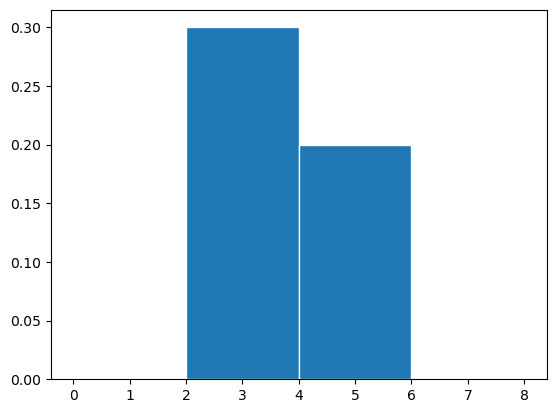

In [76]:
plt.hist(points, bins=range(0, 10, 2), ec='w', density=True);

Let's define some **kernels**. We will explain these formulas momentarily. We'll also define some helper functions for visualization purposes.

In [78]:
def gaussian(x, z, a):
    # Code Here
    return (1 / (np.sqrt(2 * np.pi) * a)) * np.exp(-0.5 * ((x - z) / a) ** 2)
def boxcar_basic(x, z, a):
    # Code Here
    return np.where(np.abs(x - z) <= a / 2, 1 / a, 0)
def boxcar(x, z, a):
    # Code Here
    kernel_values = np.zeros_like(x)
    for zi in z:
        kernel_values += boxcar_basic(x, zi, a)
    return kernel_values

In [79]:
def create_kde(kernel, pts, a):
    # Code Here
    x = np.linspace(min(pts) - 2, max(pts) + 2, 1000)
    kde_values = np.zeros_like(x)
    for pt in pts:
        kde_values += kernel(x, pt, a)
    kde_values *= 1 / len(pts)
    return x, kde_values

def plot_kde(kernel, pts, a):
    # Code Here
    x, kde_values = create_kde(kernel, pts, a)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, kde_values, label='KDE', color='blue')
    plt.hist(pts, bins=30, density=True, alpha=0.5, color='orange', label='Histogram')
    plt.title('Kernel Density Estimate')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()
def plot_separate_kernels(kernel, pts, a, norm=False):
    # Code Here
    x = np.linspace(min(pts) - 2, max(pts) + 2, 1000)
    
    plt.figure(figsize=(10, 6))
    for pt in pts:
        kernel_values = kernel(x, pt, a)
        if norm:
            kernel_values /= np.trapz(kernel_values, x)  # Normalize if required
        plt.plot(x, kernel_values, label=f'Kernel for {pt}')

    plt.title('Individual Kernel Contributions')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()


Here are our five points represented as vertical bars.

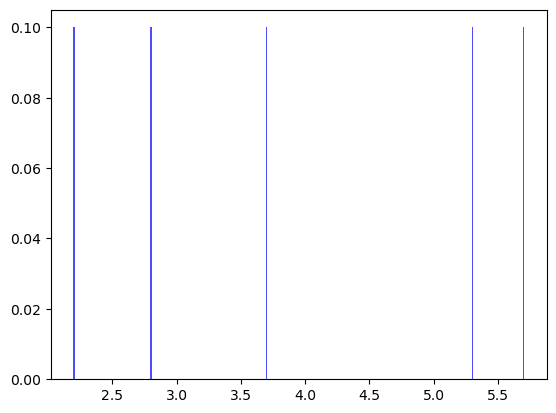

In [80]:
plt.bar(points, np.ones_like(points) * 0.1, width=0.01, color='blue', alpha=0.7);

### Step 1: Place a kernel at each point

We'll start with the Gaussian kernel.

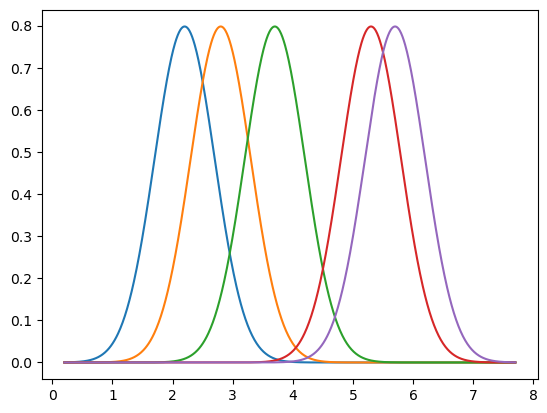

In [84]:
# code Here
bandwidth = 0.5

# Create an array of x values for plotting
x = np.linspace(min(points) - 2, max(points) + 2, 1000)

# Plot each Gaussian kernel centered at each point
for pt in points:
    plt.plot(x, gaussian(x, pt, bandwidth), label=f'Kernel at {pt}')


### Step 2: Normalize kernels so that total area is 1

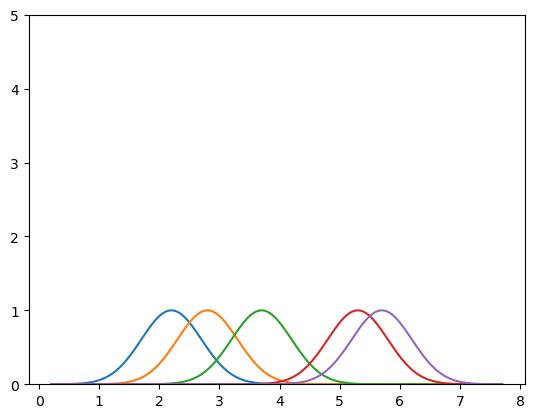

In [ ]:
# Code Here
for pt in points:
    kernel_values = gaussian(x, pt, bandwidth);
    normalized_values = kernel_values / np.max(kernel_values);
    plt.plot(x, normalized_values, label=f'Kernel at {pt}');
plt.ylim(0, 5);


### Step 3: Sum all kernels together

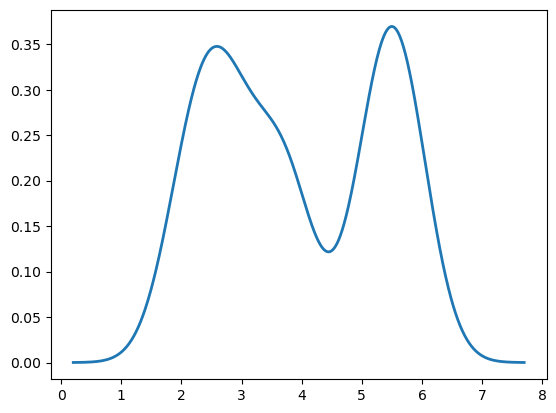

In [112]:
# code here
kde = np.sum([gaussian(x, pt, bandwidth) / np.max(gaussian(x, pt, bandwidth)) for pt in points], axis=0) / len(points)
# Plot only the combined KDE
plt.plot(x, kde, linewidth=2, label='Combined KDE', )
plt.show()

This looks identical to the smooth curve that `sns.distplot` gives us (when we set the appropriate parameter):

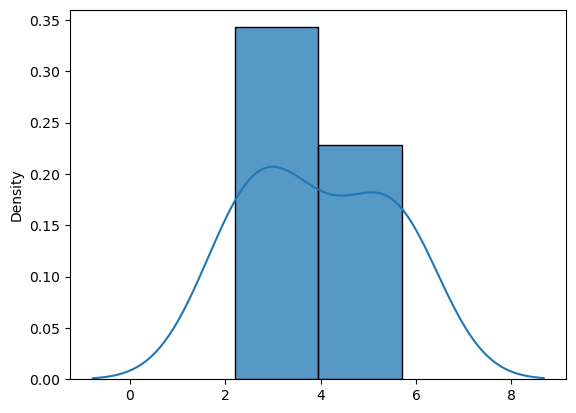

In [ ]:
# code Here]


You can also get a very similar result in a single call by requesting the KDE be added to the histogram, with `kde=True` and some extra keywords:

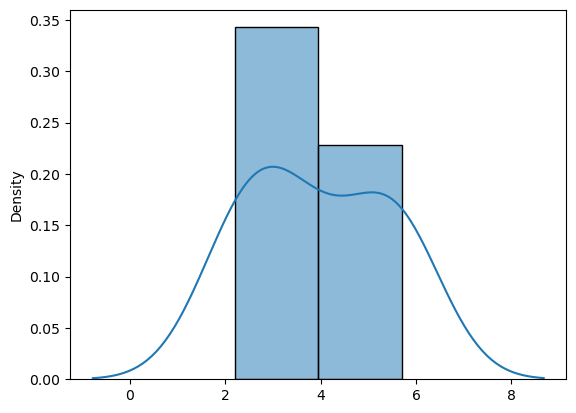

In [ ]:
# code Here

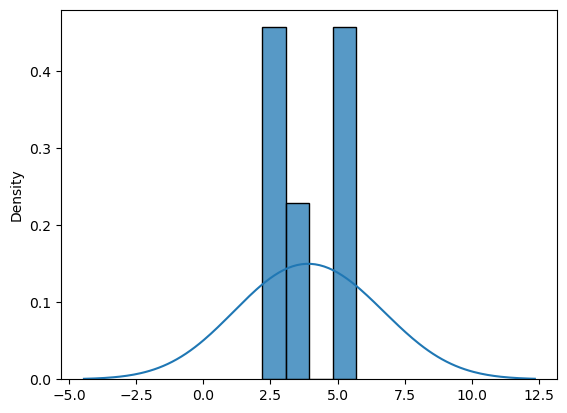

In [ ]:
# code Here

## Kernels

**Gaussian**

$$K_{\alpha}(x, x_i) = \frac{1}{\sqrt{2 \pi \alpha^2}} e^{-\frac{(x - x_i)^2}{2\alpha^2}}$$


**Boxcar**


$$K_{\alpha}(x, x_i) = \begin {cases}
			\frac{1}{\alpha}, \: \: \: |x - x_i| \leq \frac{\alpha}{2}\\
			0, \: \: \: \text{else}
			\end{cases}$$

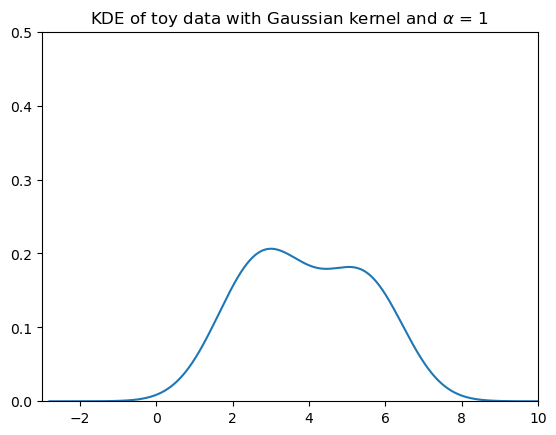

In [ ]:
# code Here

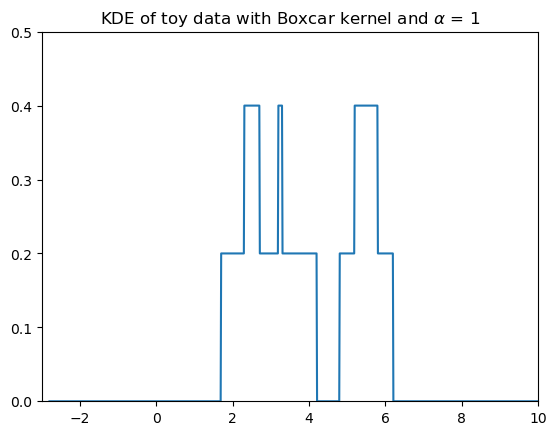

In [ ]:
# code Here

## Effect of bandwidth hyperparameter $\alpha$

Let's bring in some (different) toy data.

In [134]:
tips = sns.load_dataset('tips')

In [135]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [136]:
# code Here
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [137]:
px.histogram(data_frame=tips,x='total_bill')

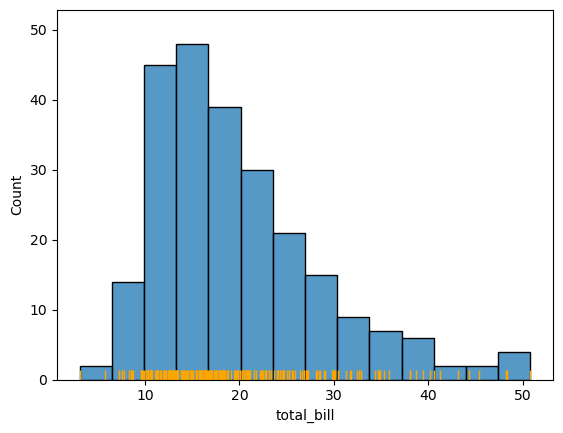

In [ ]:
#code Here

### KDE Formula

$$f_{\alpha}(x) = \sum_{i = 1}^n \frac{1}{n} \cdot K_{\alpha}(x, x_i) =  \frac{1}{n} \sum_{i = 1}^n K_{\alpha}(x, x_i)$$

c:\Users\nasrullah\.conda\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



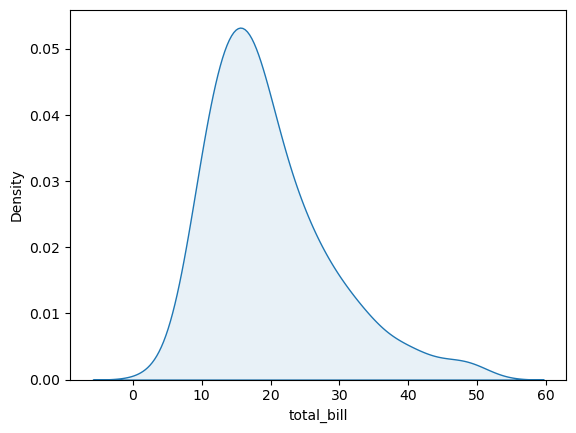

In [139]:
sns.kdeplot(data=tips, x='total_bill', bw_adjust=1, fill=True, alpha=0.1);

c:\Users\nasrullah\.conda\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



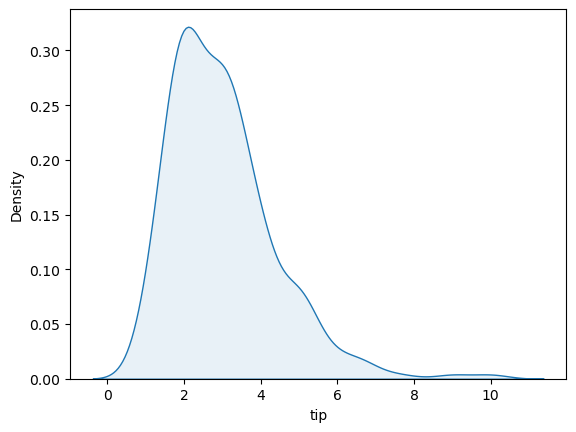

In [141]:
sns.kdeplot(data=tips, x='tip', bw_adjust=1, fill=True, alpha=0.1);

c:\Users\nasrullah\.conda\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



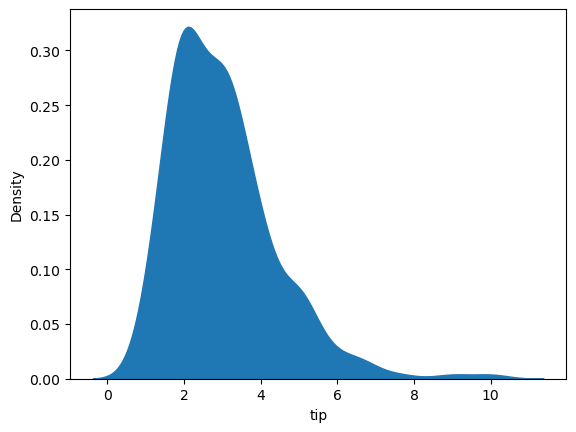

In [145]:
# Code Here
sns.kdeplot(data=tips, x='tip', bw_adjust=1, fill=True, alpha=1);